# Part A: Let's visualise some more!

## Exercise 1: Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.

### Visualize the network using the NetworkX draw function, and node-coordinates from the force atlas algorithm. As in the previous Exercise:
    - Node color should depend on the length_of_content attribute (see notes from last week).
    - Node size should depend on the node degree

In [70]:
import os
import pickle
import networkx as nx
from fa2_modified import ForceAtlas2


# Define the relative folder path where the pickle file is saved
folder_path = "/Users/aya/Desktop/Skole/social_graps/Aya/shared"

# Define the full path including the file name
file_path = os.path.join(folder_path, 'performer_network.pkl')

# Load the graph from the specified file path
with open(file_path, 'rb') as f:
    G = pickle.load(f)





100%|██████████| 1000/1000 [00:15<00:00, 64.39it/s]


BarnesHut Approximation  took  2.38  seconds
Repulsion forces  took  12.32  seconds
Gravitational forces  took  0.08  seconds
Attraction forces  took  0.12  seconds
AdjustSpeedAndApplyForces step  took  0.36  seconds


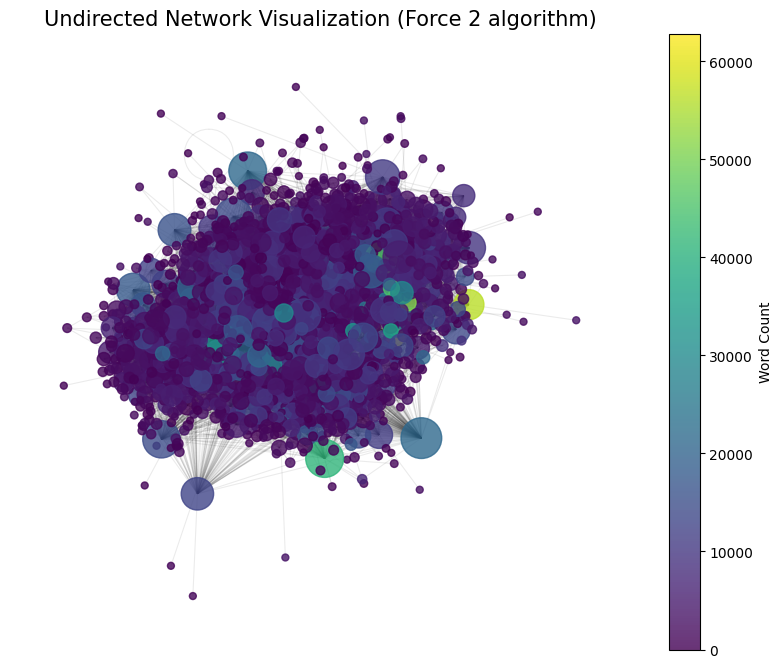

In [96]:
import matplotlib.pyplot as plt

G_und = G.to_undirected()

forceatlas2 = ForceAtlas2(
                        outboundAttractionDistribution=True, 
                        linLogMode=False,
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0,
                        jitterTolerance=1.0,
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        scalingRatio=0.001,
                        strongGravityMode=False,
                        gravity=1.5,
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G_und, pos=None, iterations=1000)

node_sizes = [20 + 5 * G_und.degree(node) for node in G_und.nodes()]
node_colors = [G_und.nodes[node].get('word_count', 0) for node in G_und.nodes()]

plt.figure(figsize=(10, 8))

# Capture the node drawing so we can pass it to plt.colorbar
nodes = nx.draw_networkx_nodes(G_und, positions, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.8)

nx.draw_networkx_edges(G_und, positions, edge_color="black", alpha=0.08, width=0.8)

# Add colorbar for the node colors
plt.colorbar(nodes, label='Word Count')

plt.title('Undirected Network Visualization (Force 2 algorithm)', fontsize=15)
plt.axis('off')
plt.show()


## Exercise 2: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.

### Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
1. Consider the set of neighbours pointing towards the node found above.

2. What is the relation between the characters you identified and their network neighbours? (e.g. did they sing a song togtether)?, are they opponents?, etc ...). You don't need to come up with a grand theory of Country Music here, I just want you to think about how links arise, why the links are there.

3. Repeat the exercise for the highest out-degree node.

4. Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia


In [46]:
in_degrees = dict(G.in_degree())

max_in_degree_node = max(in_degrees, key=in_degrees.get)
max_in_degree_value = in_degrees[max_in_degree_node]

predecessors = list(G.predecessors(max_in_degree_node))

print(f"The node with the highest in-degree is: {max_in_degree_node}, with an in-degree of {max_in_degree_value}")
print(f"Nodes pointing to {max_in_degree_node}: {predecessors}")



The node with the highest in-degree is: Willie Nelson, with an in-degree of 199
Nodes pointing to Willie Nelson: ['Ray Benson', 'Johnny Gimble', 'Keith Gattis', 'Parker McCollum', 'Ashley McBryde', 'Emmylou Harris', 'June Carter Cash', 'Teea Goans', 'Miranda Lambert', 'Jerry Lee Lewis', 'Julianne Hough', 'Bob Dylan', 'John Jorgenson', 'Kenny Chesney', 'Julienne Irwin', 'Faron Young', 'Beyoncé', 'Glen Campbell', 'Eric Church', 'Orville Peck', 'Mike Stinson', 'Rita Wilson', 'Patsy Cline', 'Loretta Lynn', 'Steve Moakler', 'The Time Jumpers', 'Larry Gatlin', 'Narvel Felts', 'The Highwomen', 'Carlene Carter', 'Brandon Jenkins (musician)', 'Floyd Tillman', 'The Geezinslaw Brothers', 'Hal Willis (singer)', 'Red Wanting Blue', 'John Mellencamp', 'The Highwaymen (country supergroup)', 'Kacey Jones', 'Rob Ickes', 'Gary Nicholson (singer)', 'Guy Clark', 'Pat Green', 'Lee Ann Womack', 'Duane Eddy', 'Toby Keith', 'Carl Perkins', 'Trisha Yearwood', 'Scotty Emerick', 'Leslie Satcher', 'Blaze Foley', 

#### The relation between Willie Nelson and his neighbours.

By looking at all Willie's neighbours, it can be seen (by also reseearching the ones we dont know by name), many of the listed people have actually sung with Willie on different albums and project e.g. Ray Charles collaborated with him "Seven Spanish Angels" and Johnny Cash has collaborated with him many times as part of a group called [The Highwaymen](https://en.wikipedia.org/wiki/The_Highwaymen_(country_supergroup)).

##### Relations that arent as direct or singing collaborations.
Some of his other neighbours like are people he has either shared a stage with, influenced or just been featured on the same album as eachother. An example is Justin Timberlake, while not a direct musical collaborator, Timberlake performed with Willie Nelson in various events and tributes. The same goes for Beyonce whom he also shares a connection to Texas with. 

Many of the artists on the list have collaborated with Willie Nelson either through singing together, performing at events, or being part of the same music movements. For the rest, their connection may be more indirect, such as through influence, shared performances, or membership in the country music world.

In [47]:
# Get the out-degrees of all nodes as a dictionary
out_degrees = dict(G.out_degree())

max_out_degree_node = max(out_degrees, key=out_degrees.get)
max_out_degree_value = out_degrees[max_out_degree_node]

successors = list(G.successors(max_out_degree_node))

print(f"The node with the highest out-degree is: {max_out_degree_node}, with out-degree: {max_out_degree_value}")
print(f"Nodes {max_out_degree_node} is pointing to: {successors}")


The node with the highest out-degree is: Hillary Lindsey, with out-degree: 100
Nodes Hillary Lindsey is pointing to: ['Lori McKenna', 'Aubrey Peeples', 'Steven Lee Olsen', 'Reba McEntire', 'Jimmy Wayne', 'Steel Magnolia', 'Mickey Guyton', 'Priscilla Block', 'Chris Lane', 'Thompson Square', 'Lee Brice', 'Meghan Linsey', 'Gloriana (band)', 'Heidi Newfield', 'Sam Palladio', 'Foster & Lloyd', 'Dierks Bentley', 'Kellie Pickler', 'Kenny Chesney', 'Dallas Smith', 'Darius Rucker', 'Madeline Merlo', 'Thomas Rhett', 'Clare Bowen', 'Jessica Andrews', 'Josh Gracin', 'Dwight Yoakam', 'Runaway June', 'Carolyn Dawn Johnson', 'Jessica Harp', 'Wynonna Judd', 'Parmalee', 'Jordan Davis (singer)', 'Martina McBride', 'Devin Dawson', 'Carly Pearce', 'Avicii', 'Lee Ann Womack', 'Lucy Hale', 'Sara Evans', 'Kelsea Ballerini', 'Jessica Simpson', 'Joshua Scott Jones', 'Jo Dee Messina', 'Kacey Musgraves', 'Ashley Monroe', 'Hillary Scott', 'Rachel Proctor', 'Lauren Alaina', 'Ilse DeLange', 'Edens Edge', 'Blake She

#### The relation between Hillary Lindsey and her neighbours.

Hillary Lindsey is a well-known songwriter in country and pop music, having worked with many prominent artists. Her relationship with the nodes she points to is likely through songwriting, collaborations, or shared projects. Most of the connections to the artists listed above stem from Lindsey having written or co-written songs for their albums, especially in the country and pop genres.

For some artists, Lindsey’s contributions extend beyond songwriting, whether is is awards, performances or events. Many of the songs she wrote became award-winning tracks for artists like Carrie Underwood, Miranda Lambert, and Lady A, and while Lindsey isn’t as involved in live performances, many of the artists she wrote for would have performed her songs in concerts and tours, possibly sharing stages during award ceremonies. She has also done some work in pop music with people like Avicii connects her further into different genres. For the rest of the artists, those not as famous for direct collaborations, they're mostly linked by production circles.

#### Are there differences between reasons for out- and in-links?
The reasons for out-links and in-links can differ significantly, reflecting the different roles a figure plays in their network and how they interact with others.

Out-links represent the connections a page makes to other pages, often highlighting professional contributions, collaborations, or influences. For example, a songwriter like Hillary Lindsey, who has written songs for many artists, will have out-links to those performers. These links signify her contribution to their careers through songwriting. Out-links can also point to influences—artists who have shaped someone’s work or career. For example, a younger artist’s page might link to an established musician they admire or have been inspired by. 

Additionally, out-links might represent joint projects, such as collaborations on albums or performances, or personal relationships, like links between family members or close friends involved in their careers.


On the other hand, in-links reflect the importance or influence of a figure in the network. A high number of in-links, like Willie Nelson’s, often indicates someone who is central to their domain. Other artists frequently link to Nelson’s page, acknowledging his influence on their music or career. In-links also arise from collaborations, where other artists mention their work with Nelson, such as duets or joint performances. Furthermore, in-links can represent mentorship, with younger artists acknowledging Nelson’s role in their development. Lastly, in-links may stem from recognition or awards, as artists might link to Nelson’s page when referencing events or honors where he played a significant role, such as tribute concerts or awards ceremonies.

In summary, out-links tend to reflect how a figure has contributed to others, while in-links highlight how others view and acknowledge that figure’s influence or importance in their field.


### Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network.


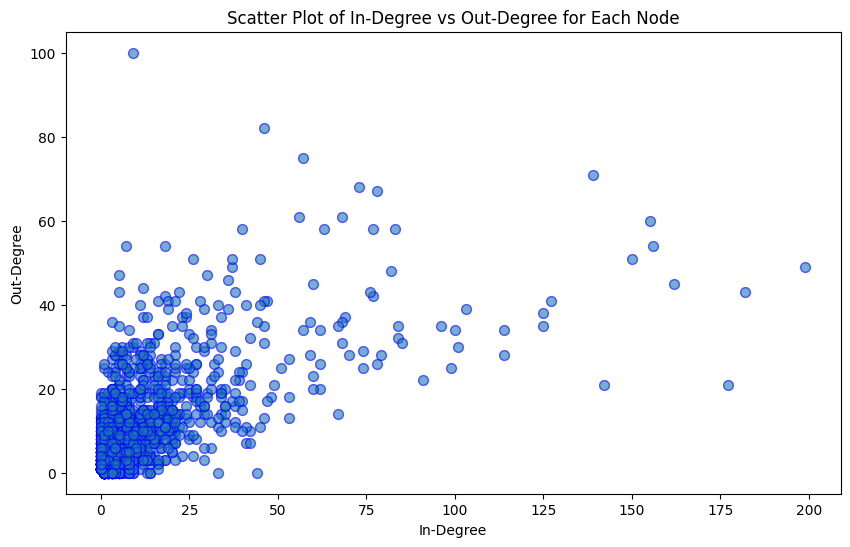

In [49]:
in_degree_values = [in_degrees[node] for node in G.nodes()]
out_degree_values = [out_degrees[node] for node in G.nodes()]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(in_degree_values, out_degree_values, alpha=0.6, edgecolors='b', s=50)

# Add labels and title
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('Scatter Plot of In-Degree vs Out-Degree for Each Node')

# Show the plot
plt.show()

##### Figure: Scatter Plot of In-Degree vs. Out-Degree for Each Node in the Network
This scatter plot illustrates the relationship between in-degree and out-degree for each node in the network. Each point represents a node, where the x-axis indicates the number of incoming connections (in-degree) and the y-axis indicates the number of outgoing connections (out-degree). The plot provides a visual overview of how in-degrees and out-degrees are distributed across the nodes.

The scatter plot shows an interesting relationship between in-degree and out-degree for the nodes in the network. Most nodes are clustered in the lower-left part of the plot, meaning they have both low in-degrees and low out-degrees. These nodes are likely to be less influential overall, not frequently referenced by others (low in-degree) and not contributing much in terms of outgoing connections (low out-degree).

However, a few outliers stand out with notably high values. Some nodes exhibit very high in-degrees, nearing 200, which suggests they are central figures in the network, frequently referenced by many others. On the other hand, there are nodes with high out-degrees, around 100, indicating that they actively influence or reference a large number of other nodes.

The plot also reveals both balanced and unbalanced nodes. Balanced nodes, where the in-degree and out-degree are roughly equal, appear close to the diagonal, suggesting a more reciprocal role in the network. In contrast, unbalanced nodes, especially those in the upper-left region, have low in-degrees but high out-degrees, indicating they are outwardly influential but not often referenced by others.

In summary, while most nodes remain relatively peripheral with low in- and out-degrees, a few key players emerge with higher values, representing individuals or entities that play a central role in connecting or influencing others. These outliers are likely significant figures in the network, either because they are widely referenced or because they engage with many other nodes.

### Are there any nodes with high out-degree and with few incoming connections?



In [59]:
# Define a threshold for high out-degree and low in-degree
high_out_degree_threshold = 70
low_in_degree_threshold = 10    

# Find nodes with high out-degree and low in-degree
high_out_low_in_nodes = [
    node for node in G.nodes()
    if G.out_degree(node) > high_out_degree_threshold and G.in_degree(node) < low_in_degree_threshold
]

# Print the nodes that satisfy the condition
print(f"Nodes with high out-degree (> {high_out_degree_threshold}) and low in-degree (< {low_in_degree_threshold}):")
for node in high_out_low_in_nodes:
    print(f"Node: {node}, Out-degree: {G.out_degree(node)}, In-degree: {G.in_degree(node)}")


Nodes with high out-degree (> 70) and low in-degree (< 10):
Node: Hillary Lindsey, Out-degree: 100, In-degree: 9


Hillary Lindsey is a prominent American songwriter, particularly known for her work in the country music genre. The results of the network analysis show that she has a high out-degree (100) and a low in-degree (9), meaning that she has numerous outgoing connections (she has written songs for many artists) but relatively few incoming connections (not many other artists or entities directly reference her).

The network structure reflects how Hillary Lindsey's work connects to many artists through songwriting (high out-degree) but doesn't receive as much direct acknowledgment from other artists (low in-degree). This pattern is typical for highly prolific songwriters, who influence the music industry substantially but remain less publicly referenced compared to the performers they support.


### Are there any nodes with high in-degree and few outcoming connections?

In [65]:
# Define a threshold for high in-degree and low out-degree
high_in_degree_threshold = 100  # You can adjust this value as needed
low_out_degree_threshold = 30    # You can adjust this value as needed

# Find nodes with high in-degree and low out-degree
high_in_low_out_nodes = [
    node for node in G.nodes()
    if G.in_degree(node) > high_in_degree_threshold and G.out_degree(node) < low_out_degree_threshold
]

# Print the nodes that satisfy the condition
print(f"Nodes with high in-degree (> {high_in_degree_threshold}) and low out-degree (< {low_out_degree_threshold}):")
for node in high_in_low_out_nodes:
    print(f"Node: {node}, In-degree: {G.in_degree(node)}, Out-degree: {G.out_degree(node)}")


Nodes with high in-degree (> 100) and low out-degree (< 30):
Node: Bob Dylan, In-degree: 142, Out-degree: 21
Node: Elvis Presley, In-degree: 177, Out-degree: 21
Node: Garth Brooks, In-degree: 114, Out-degree: 28


In all three cases—Bob Dylan, Elvis Presley, and Garth Brooks—their high in-degrees are due to their monumental influence on the music industry. Many other artists and entities link to them, acknowledging their importance in shaping genres like rock, country, and pop. However, their low out-degrees suggest that these figures do not frequently engage in outward collaboration or connection, either because of their status as pioneers or because of the nature of their careers, which are often more self-contained. They are often referenced but do not themselves need to make many outward connections to others, as their work and legacy stand on their own.

Conclusion:
The pattern of high in-degree and low out-degree for these iconic figures reflects their centrality and influence in music history. They are widely acknowledged by others, but they themselves don’t need to collaborate as extensively or reference others to maintain their prominence. This highlights how certain figures can hold a significant position in a network through their influence alone, even without many direct outward connections.